In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler


In [53]:
#loading data ro Pandas DataFrame

red_wine_df = pd.read_csv("Resources/winequality-red.csv")
white_wine_df = pd.read_csv("Resources/winequality-white.csv")

In [54]:
#view the dataset
white_wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [55]:
# Analysis and Visulaization
#statistical measures of the dataset

white_wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


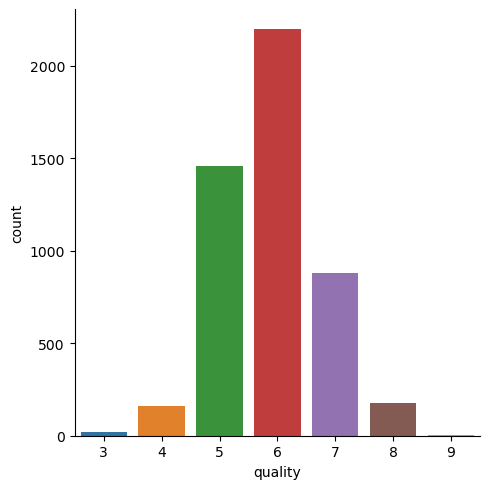

In [56]:
# number of values for each quality
sns.catplot(x= 'quality', data = white_wine_df, kind = 'count')

<Axes: xlabel='quality', ylabel='citric acid'>

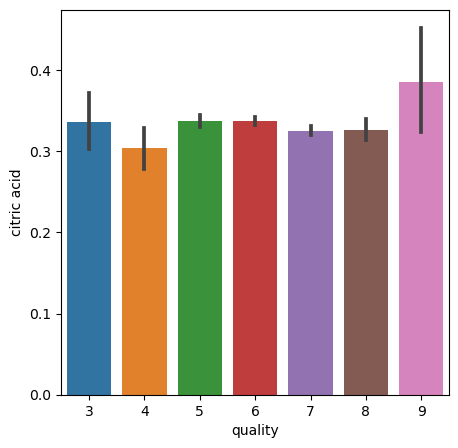

In [57]:
# compare quality and citric acid
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='citric acid', data = white_wine_df)

<Axes: xlabel='quality', ylabel='volatile acidity'>

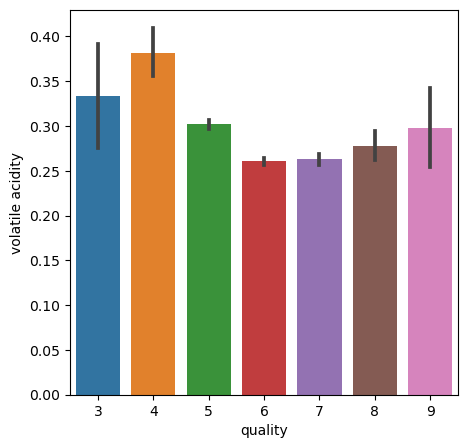

In [58]:
# compare quality and volatile acidity
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='volatile acidity', data = white_wine_df)

<Axes: xlabel='quality', ylabel='residual sugar'>

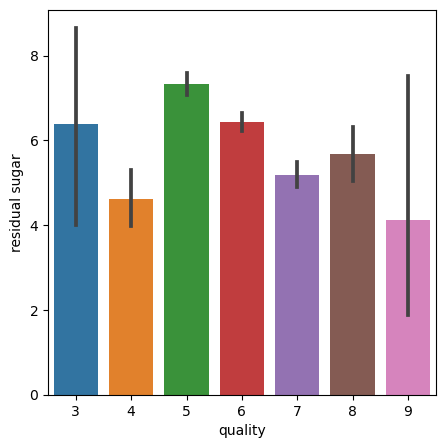

In [59]:
# compare quality and residual sugar
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='residual sugar', data = white_wine_df)

<Axes: xlabel='quality', ylabel='chlorides'>

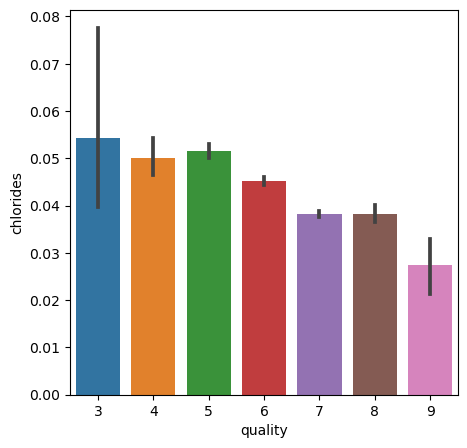

In [60]:
# compare quality and chlorides
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='chlorides', data = white_wine_df)

<Axes: xlabel='quality', ylabel='free sulfur dioxide'>

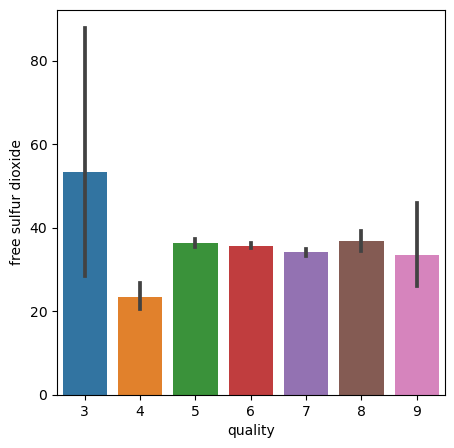

In [61]:
# compare quality and free sulfur dioxide
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='free sulfur dioxide', data = white_wine_df)

<Axes: xlabel='quality', ylabel='density'>

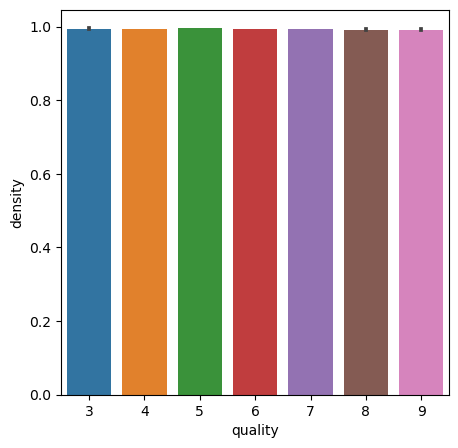

In [62]:
# compare quality and density
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='density', data = white_wine_df)

<Axes: xlabel='quality', ylabel='pH'>

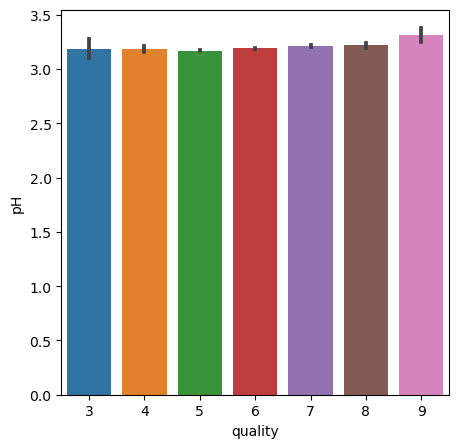

In [63]:
# compare quality and pH
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='pH', data = white_wine_df)

<Axes: xlabel='quality', ylabel='sulphates'>

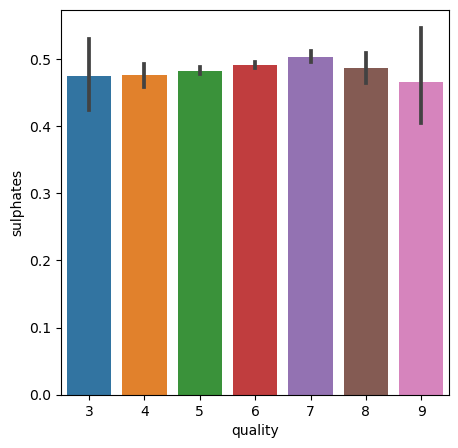

In [64]:
# compare quality and sulphates
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='sulphates', data = white_wine_df)

<Axes: xlabel='quality', ylabel='alcohol'>

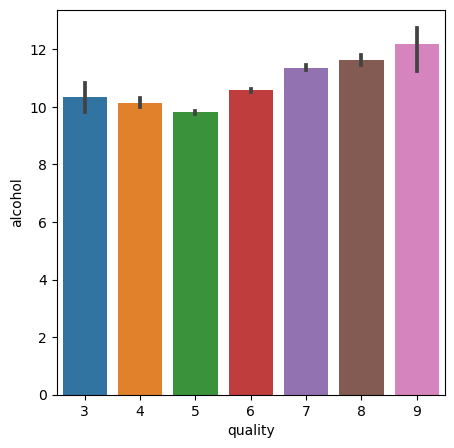

In [65]:
# compare quality and alcohol
plot = plt.figure(figsize= (5,5))
sns.barplot(x='quality', y='alcohol', data = white_wine_df)

In [66]:
#Correlation
white_wine_df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


<Axes: >

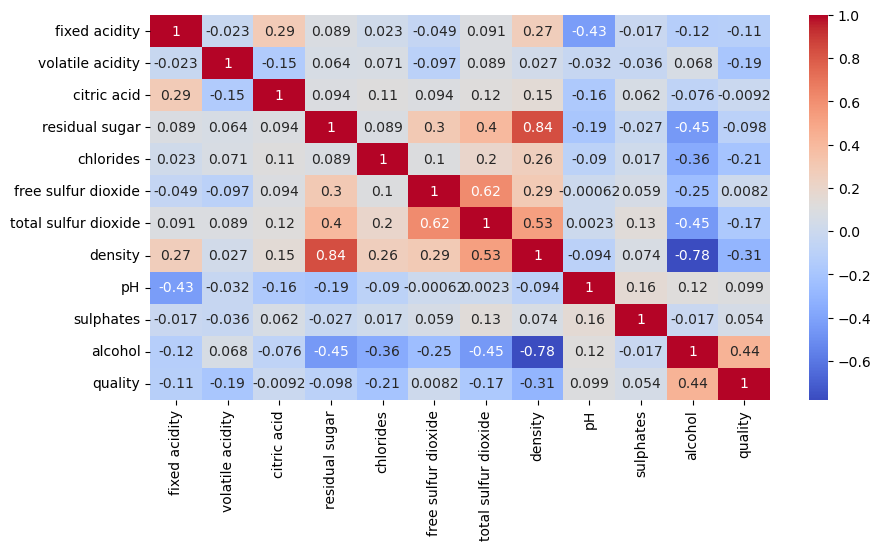

In [67]:
corr = white_wine_df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [68]:
# separate the data and label
X= white_wine_df.drop('quality', axis=1)
Y= white_wine_df['quality'].apply(lambda y_value: 1 if y_value>=6 else 0)

In [69]:
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9


In [70]:
print(Y)

0       1
1       1
2       1
3       1
4       1
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: quality, Length: 4898, dtype: int64


In [71]:
#Train and Test data
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size =0.2, random_state=3)

In [72]:
print(y.shape, Y_train.shape, Y_test.shape)

(4898,) (3918,) (980,)


In [73]:
# Use Random Forest for model training
model = RandomForestClassifier()


In [74]:
model.fit(X_train, Y_train)

RandomForestClassifier()

In [75]:
#Accuracy Score
x_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(x_test_prediction, Y_test)

In [76]:
print('Accuracy:', test_data_accuracy)

Accuracy: 0.8295918367346938


In [77]:
#Prediction System
input_data =(8.1,0.27,0.41,1.45,0.033,11,63,0.9908,2.99,0.56,12)
input_data_as_numpy = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 1):
    print('Good quality')
else:
    print('Bad quality')

[0]
Bad quality


C:\Users\huiwa\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
